In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats

In [2]:
import matplotlib as mpl
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(16,12,12,12)

In [3]:
Ne = 69
Ns = 2*Ne
#non-thermal iterations
M0 = int(1e5)
M = int(10e6)

step = 0.038
t = 1j

In [6]:
boundaries = np.arange(0.0100, 0.3001, 0.0050)
ps = np.zeros((boundaries.size,2))
term = 'p'
state = 'free_fermions'
for i in range(boundaries.size):
    signs = np.loadtxt(f"../results/{state}/n_{Ne}_dense/{term}/{state}_{term}_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.4f}_step_{step:.3f}.dat")
    ps[i] = signs#[0,:]
np.savetxt(f"dense_{state}_{term}_Ne_{Ne}_Ns_{Ns}_t_1.00_step_{step:.3f}_circles.dat", np.vstack((boundaries, ps.T)).T)

#Lxs = np.arange(10,91,10)
#Lys = 2*np.pi*Ns/Lxs
#rs = Lys/Lxs

In [7]:
kf = {12: 2.5, 21:5, 32: 8.5, 37:10, 69:20}
Lx = {12:12.279920495357862, 21:16.244807875181, 32: 20.053026197048002, 37: 21.56283174194172, 69:29.44621490770559 }

### Ne = 12

In [32]:
Ne = 12

p_cfl = np.loadtxt(f"cfl_p_Ne_12_Ns_24_t_1.00_step_0.087_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_12_Ns_24_t_1.00_step_0.087_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_12_Ns_24_t_1.00_step_0.087_circles.dat")
boundaries = p_cfl[:-7,0]
p_cfl_means = p_cfl[:-7,1]
p_cfl_vars = p_cfl[:-7,2]
mod_cfl_means = mod_cfl[:-7,1]
mod_cfl_vars = mod_cfl[:-7,2]
sign_cfl_means = sign_cfl[:-7,1]
sign_cfl_vars = sign_cfl[:-7,2]


p_ff = np.loadtxt(f"free_fermions_p_Ne_12_Ns_24_t_1.00_step_0.095_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_12_Ns_24_t_1.00_step_0.095_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_12_Ns_24_t_1.00_step_0.095_circles.dat")
p_ff_means = p_ff[:-7,1]
p_ff_vars = p_ff[:-7,2]
mod_ff_means = mod_ff[:-7,1]
mod_ff_vars = mod_ff[:-7,2]
sign_ff_means = sign_ff[:-7,1]
sign_ff_vars = sign_ff[:-7,2]

x = boundaries*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [33]:
S_mod_cfl = -np.log(p_cfl_means*mod_cfl_means)
err_mod_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2) + mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M-M0)

S_cfl = S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_mod_cfl**2 + err_sign_cfl**2)

S_mod_ff = -np.log(p_ff_means*mod_ff_means)
err_mod_ff = np.sqrt(p_ff_vars/(p_ff_means**2) + mod_ff_vars/(mod_ff_means**2))/np.sqrt(M-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M-M0)

S_ff = S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_mod_ff**2 + err_sign_ff**2)


In [34]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x), S_cfl/x, deg=1, cov=True)
popt_ff, pcov_ff = np.polyfit(np.log(x), S_ff/x, deg=1, cov=True)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]

popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x), S_sign_cfl/x, deg=1, cov=True)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x), S_sign_ff/x, deg=1, cov=True)

y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

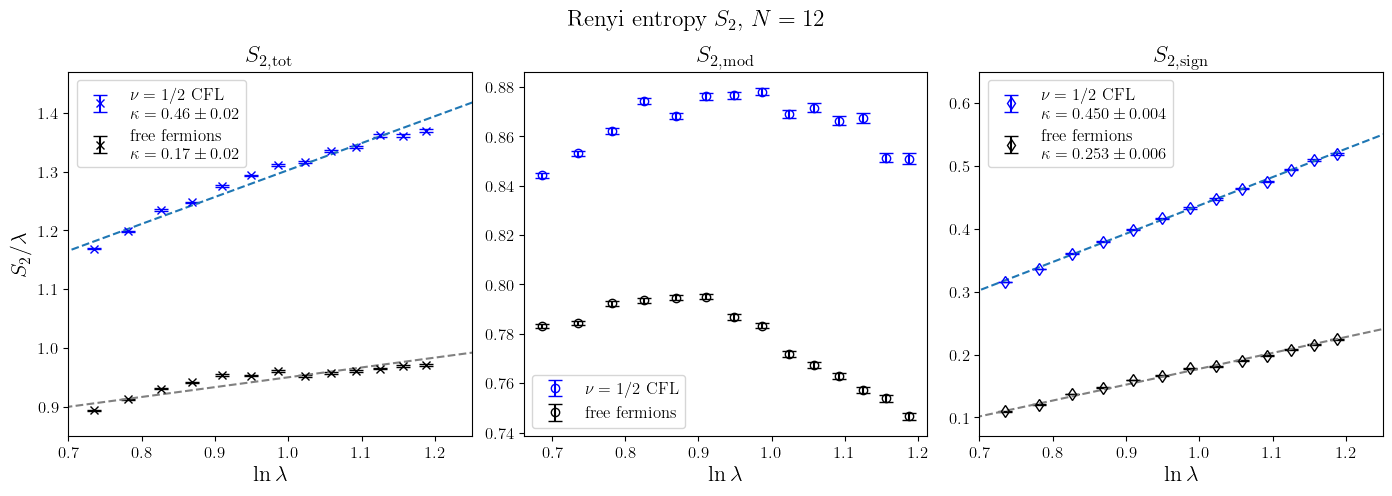

In [41]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle('Renyi entropy $S_{2}$, $N=12$ ')

ax[0].errorbar(np.log(x), (S_cfl/x), err_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.2f} \pm {np.sqrt(pcov_cfl[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x), (S_ff/x), err_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_ff, '--', c='gray')
ax[0].legend()
ax[0].set_ylabel('$S_{2}/\\lambda$')
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_xlim(0.7,1.25)
ax[0].set_ylim(0.85,1.47)
ax[0].set_title('$S_{2, \mathrm{tot}}$')

ax[1].errorbar(np.log(x), (S_mod_cfl/x), err_mod_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL')
ax[1].errorbar(np.log(x), (S_mod_ff/x), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')

ax[2].errorbar(np.log(x), (S_sign_cfl/x), err_sign_cfl, marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x), (S_sign_ff/x), err_sign_ff, marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.7,1.25)
ax[2].set_ylim(0.07,0.65)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

plt.savefig('cfl n=12.png', dpi=350)

### N = 21

In [57]:
Ne = 21

p_cfl = np.loadtxt(f"cfl_p_Ne_21_Ns_42_t_1.00_step_0.060_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_21_Ns_42_t_1.00_step_0.060_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_21_Ns_42_t_1.00_step_0.060_circles.dat")
p_cfl_means = p_cfl[:,1]
p_cfl_vars = p_cfl[:,2]
mod_cfl_means = mod_cfl[:,1]
mod_cfl_vars = mod_cfl[:,2]
sign_cfl_means = sign_cfl[:,1]
sign_cfl_vars = sign_cfl[:,2]


boundaries_cfl = p_cfl[:,0]
x_cfl = boundaries_cfl*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]


p_ff = np.loadtxt(f"free_fermions_p_Ne_21_Ns_42_t_1.00_step_0.070_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_21_Ns_42_t_1.00_step_0.070_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_21_Ns_42_t_1.00_step_0.070_circles.dat")
p_ff_means = p_ff[:,1]
p_ff_vars = p_ff[:,2]
mod_ff_means = mod_ff[:,1]
mod_ff_vars = mod_ff[:,2]
sign_ff_means = sign_ff[:,1]
sign_ff_vars = sign_ff[:,2]

boundaries_ff = p_ff[:,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]


In [58]:
boundaries_ff

array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   , 0.1125, 0.125 , 0.1375,
       0.15  , 0.1625, 0.175 , 0.1875, 0.2   , 0.2125, 0.225 , 0.2375,
       0.25  , 0.2625, 0.275 , 0.2875, 0.3   ])

In [50]:
S_m_ff = -np.log(mod_ff_means)
err_m_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M-M0)

S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M-M0)

In [51]:
S_m_cfl = -np.log(mod_cfl_means)
err_m_cfl = np.sqrt(mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M-M0)

S_p_cfl = -np.log(p_cfl_means)
err_p_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2))/np.sqrt(M-M0)

<ErrorbarContainer object of 3 artists>

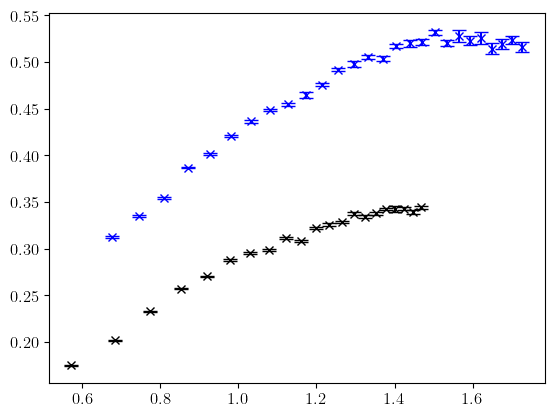

In [52]:
plt.errorbar(np.log(x_ff), (S_m_ff/x_ff), err_m_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
plt.errorbar(np.log(x_cfl), (S_m_cfl/x_cfl), err_m_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

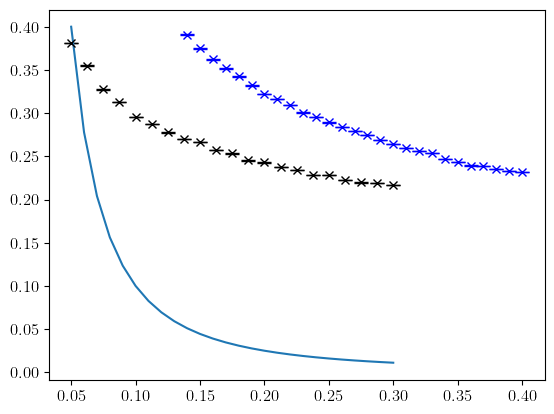

In [61]:
plt.errorbar(boundaries_ff, p_ff_means, np.sqrt(p_ff_vars/(M-M0)), marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
plt.errorbar(boundaries_cfl, p_cfl_means, np.sqrt(p_cfl_vars/(M-M0)), marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

x = np.arange(0.05, 0.31, 0.01)
y = 0.001/(x**2)
plt.plot(x,y)

<ErrorbarContainer object of 3 artists>

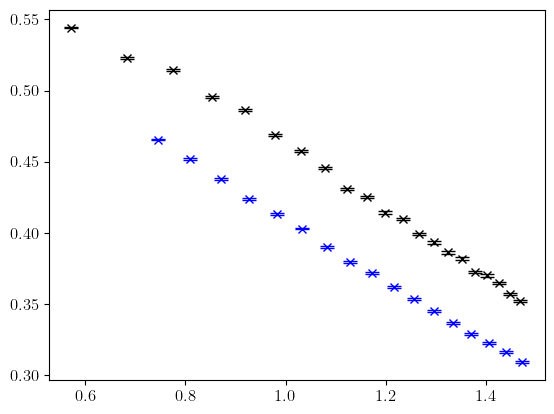

In [47]:
plt.errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')
plt.errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none')

In [26]:
S_mod_cfl = -np.log(p_cfl_means*mod_cfl_means)
err_mod_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2) + mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M-M0)

S_cfl = S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_mod_cfl**2 + err_sign_cfl**2)

S_mod_ff = -np.log(p_ff_means*mod_ff_means)
err_mod_ff = np.sqrt(p_ff_vars/(p_ff_means**2) + mod_ff_vars/(mod_ff_means**2))/np.sqrt(M-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M-M0)

S_ff = S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_mod_ff**2 + err_sign_ff**2)


In [27]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x_cfl), S_cfl/x_cfl, deg=1, cov=True)
popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]

popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x_cfl), S_sign_cfl/x_cfl, deg=1, cov=True)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

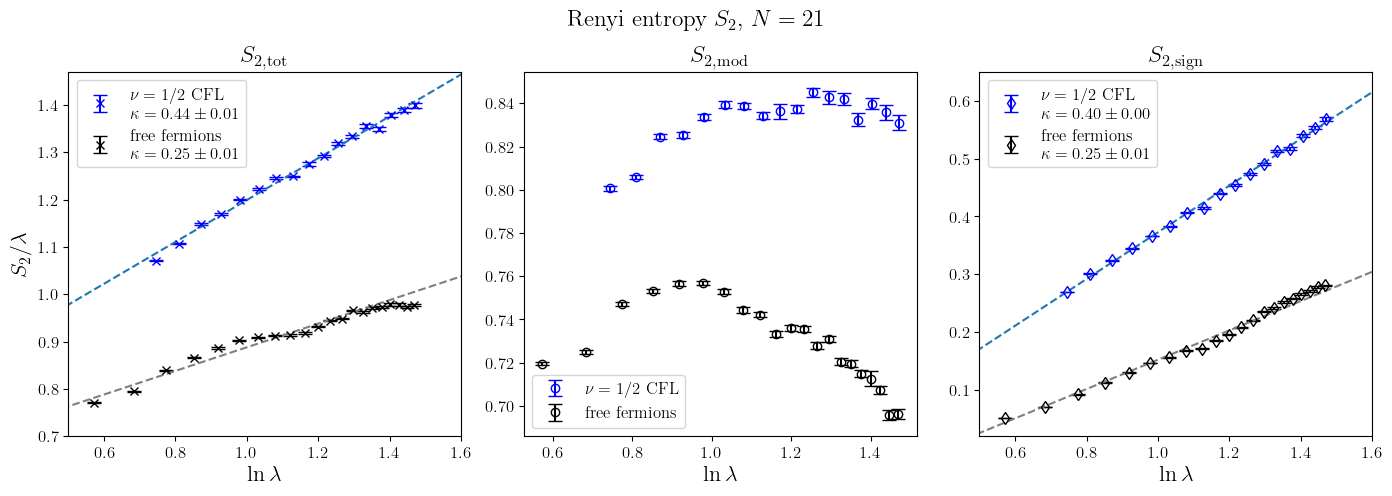

In [28]:
fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle('Renyi entropy $S_{2}$, $N=21$ ')

ax[0].errorbar(np.log(x_cfl), (S_cfl/x_cfl), err_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.2f} \pm {np.sqrt(pcov_cfl[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_cfl, '--', c='tab:blue')
#ax[0].plot(x_fit, x_fit*0.5 + popt_cfl[1]-0.06, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (S_ff/x_ff), err_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.2f} \pm {np.sqrt(pcov_ff[0,0]):.2f}$')
ax[0].plot(x_fit, y_fit_ff, '--', c='gray')
ax[0].legend()
ax[0].set_ylabel('$S_{2}/\\lambda$')
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_xlim(0.5,1.6)
ax[0].set_ylim(0.7,1.47)
ax[0].set_title('$S_{2, \mathrm{tot}}$')

ax[1].errorbar(np.log(x_cfl), (S_mod_cfl/x_cfl), err_mod_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL')
ax[1].errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')

ax[2].errorbar(np.log(x_cfl), (S_sign_cfl/x_cfl), err_sign_cfl, marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.2f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.2f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.2f} \pm {np.sqrt(pcov_sign_ff[0,0]):.2f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.5,1.6)
ax[2].set_ylim(0.02,0.65)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

#plt.savefig('cfl n=21.png', dpi=350) 

### N = 32

In [95]:
Ne = 32
M0 = int(1e5)

M_cfl = int(5e6)
M_ff = int(15e6)

p_cfl = np.loadtxt(f"cfl_p_Ne_32_Ns_64_t_1.00_step_0.050_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_32_Ns_64_t_1.00_step_0.050_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_32_Ns_64_t_1.00_step_0.050_circles.dat")
p_cfl_means = p_cfl[:,1]
p_cfl_vars = p_cfl[:,2]
mod_cfl_means = mod_cfl[:,1]
mod_cfl_vars = mod_cfl[:,2]
sign_cfl_means = sign_cfl[:,1]
sign_cfl_vars = sign_cfl[:,2]

boundaries_cfl = p_cfl[:,0]
x_cfl =  np.sqrt(boundaries_cfl/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

p_ff = np.loadtxt(f"free_fermions_p_Ne_32_Ns_64_t_1.00_step_0.055_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_32_Ns_64_t_1.00_step_0.055_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_32_Ns_64_t_1.00_step_0.055_circles.dat")
p_ff_means = p_ff[:,1]
p_ff_vars = p_ff[:,2]
mod_ff_means = mod_ff[:,1]
mod_ff_vars = mod_ff[:,2]
sign_ff_means = sign_ff[:,1]
sign_ff_vars = sign_ff[:,2]

boundaries_ff = p_ff[:,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [96]:
S_p_cfl = -np.log(p_cfl_means)
err_p_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2))/np.sqrt(M_cfl-M0)

S_mod_cfl = -np.log(mod_cfl_means)
err_mod_cfl = np.sqrt(mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M_cfl-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M_cfl-M0)

S_cfl = S_p_cfl + S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_p_cfl**2 + err_mod_cfl**2 + err_sign_cfl**2)

S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M_ff-M0)

S_mod_ff = -np.log(mod_ff_means)
err_mod_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M_ff-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M_ff-M0)

S_ff = S_p_ff + S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_p_ff**2 + err_mod_ff**2 + err_sign_ff**2)

In [97]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x_cfl), S_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)
popt_p_cfl, pcov_p_cfl = np.polyfit(np.log(x_cfl), S_p_cfl/x_cfl, deg=1, cov=True, w=1/err_p_cfl)
popt_mod_cfl, pcov_mod_cfl = np.polyfit(np.log(x_cfl), S_mod_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)
popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x_cfl), S_sign_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_p_cfl = x_fit*popt_p_cfl[0] + popt_p_cfl[1]
y_fit_mod_cfl = x_fit*popt_mod_cfl[0] + popt_mod_cfl[1]
y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]

popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_p_ff, pcov_p_ff = np.polyfit(np.log(x_ff), S_p_ff/x_ff, deg=1, cov=True, w=1/err_p_ff)
popt_mod_ff, pcov_mod_ff = np.polyfit(np.log(x_ff), S_mod_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_p_ff = x_fit*popt_p_ff[0] + popt_p_ff[1]
y_fit_mod_ff = x_fit*popt_mod_ff[0] + popt_mod_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

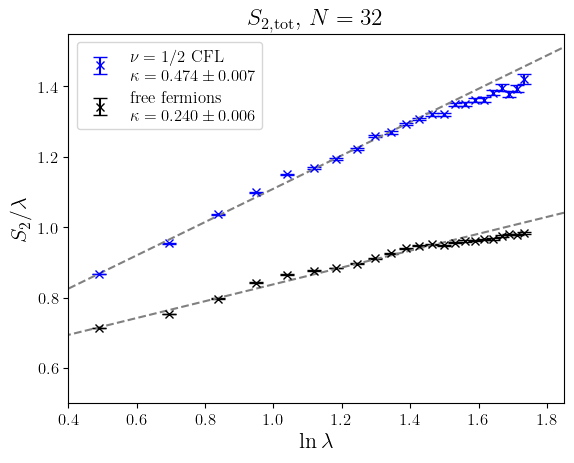

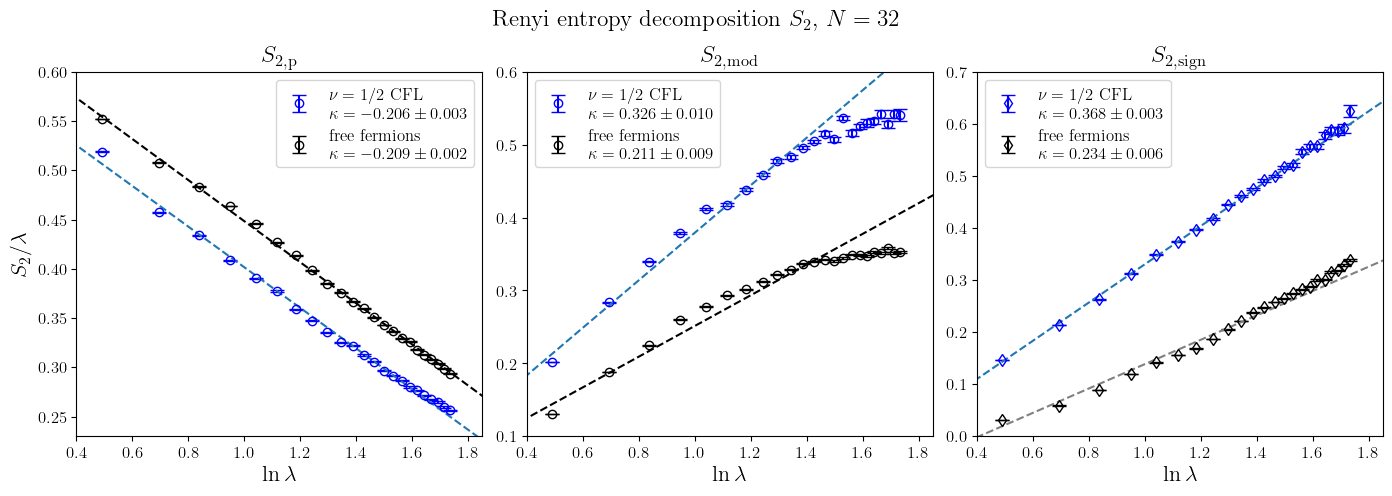

In [103]:
plt.errorbar(np.log(x_cfl), (S_cfl/x_cfl), err_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.3f} \pm {np.sqrt(pcov_cfl[0,0]):.3f}$')
plt.errorbar(np.log(x_ff), (S_ff/x_ff), err_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$')
plt.plot(x_fit, y_fit_ff, '--', c='gray')
plt.plot(x_fit, y_fit_cfl, '--', c='gray')
plt.legend()
plt.ylabel('$S_2/\\lambda$')
plt.xlabel('$\ln \\lambda$')
plt.xlim(0.4,1.85)
plt.ylim(0.5,1.55)
plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')
plt.savefig('s2 n=32.png', dpi=450) 


fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle(f'Renyi entropy decomposition $S_2$'+f', $N={Ne}$ ')


ax[0].errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_p_cfl[0]:.3f} \pm {np.sqrt(pcov_p_cfl[0,0]):.3f}$')
ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_p_ff[0]:.3f} \pm {np.sqrt(pcov_p_ff[0,0]):.3f}$')
ax[0].plot(x_fit, y_fit_p_ff, '--', c='black')
ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
ax[0].set_xlim(0.4,1.85)
ax[0].set_ylim(0.23,0.6)
ax[0].set_title('$S_{2, \mathrm{p}}$')


ax[1].errorbar(np.log(x_cfl), (S_mod_cfl/x_cfl), err_mod_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_mod_cfl[0]:.3f} \pm {np.sqrt(pcov_mod_cfl[0,0]):.3f}$')
ax[1].errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_mod_ff[0]:.3f} \pm {np.sqrt(pcov_mod_ff[0,0]):.3f}$')
ax[1].plot(x_fit, y_fit_mod_cfl, '--', c='tab:blue')
ax[1].plot(x_fit, y_fit_mod_ff, '--', c='black')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')
ax[1].set_xlim(0.4,1.85)
ax[1].set_ylim(0.1,0.6)

ax[2].errorbar(np.log(x_cfl), (S_sign_cfl/x_cfl), err_sign_cfl, marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.4,1.85)
ax[2].set_ylim(0.,0.7)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

plt.savefig('s2 decomposition n=32.png', dpi=450) 

### N = 37

In [12]:
Ne = 37
M0 = int(1e5)

M_cfl = int(10e6)
M_ff = int(15e6)

nbr_pts = -1

p_cfl = np.loadtxt(f"cfl_p_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.048_circles.dat")
mod_cfl = np.loadtxt(f"cfl_mod_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.048_circles.dat")
sign_cfl = np.loadtxt(f"cfl_sign_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.048_circles.dat")
p_cfl_means = p_cfl[:nbr_pts,1]
p_cfl_vars = p_cfl[:nbr_pts,2]
mod_cfl_means = mod_cfl[:nbr_pts,1]
mod_cfl_vars = mod_cfl[:nbr_pts,2]
sign_cfl_means = sign_cfl[:nbr_pts,1]
sign_cfl_vars = sign_cfl[:nbr_pts,2]

boundaries_cfl = p_cfl[:nbr_pts,0]
x_cfl =  np.sqrt(boundaries_cfl/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

p_ff = np.loadtxt(f"free_fermions_p_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.051_circles.dat")
mod_ff = np.loadtxt(f"free_fermions_mod_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.051_circles.dat")
sign_ff = np.loadtxt(f"free_fermions_sign_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.051_circles.dat")
p_ff_means = p_ff[:nbr_pts,1]
p_ff_vars = p_ff[:nbr_pts,2]
mod_ff_means = mod_ff[:nbr_pts,1]
mod_ff_vars = mod_ff[:nbr_pts,2]
sign_ff_means = sign_ff[:nbr_pts,1]
sign_ff_vars = sign_ff[:nbr_pts,2]

boundaries_ff = p_ff[:nbr_pts,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [13]:
S_p_cfl = -np.log(p_cfl_means)
err_p_cfl = np.sqrt(p_cfl_vars/(p_cfl_means**2))/np.sqrt(M_cfl-M0)

S_mod_cfl = -np.log(mod_cfl_means)
err_mod_cfl = np.sqrt(mod_cfl_vars/(mod_cfl_means**2))/np.sqrt(M_cfl-M0)

S_sign_cfl = -np.log(sign_cfl_means)
err_sign_cfl = np.sqrt(sign_cfl_vars/(sign_cfl_means**2))/np.sqrt(M_cfl-M0)

S_cfl = S_p_cfl + S_mod_cfl + S_sign_cfl
err_cfl = np.sqrt(err_p_cfl**2 + err_mod_cfl**2 + err_sign_cfl**2)

S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M_ff-M0)

S_mod_ff = -np.log(mod_ff_means)
err_mod_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M_ff-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M_ff-M0)

S_ff = S_p_ff + S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_p_ff**2 + err_mod_ff**2 + err_sign_ff**2)

In [14]:
popt_cfl, pcov_cfl = np.polyfit(np.log(x_cfl), S_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)
popt_p_cfl, pcov_p_cfl = np.polyfit(np.log(x_cfl), S_p_cfl/x_cfl, deg=1, cov=True, w=1/err_p_cfl)
popt_mod_cfl, pcov_mod_cfl = np.polyfit(np.log(x_cfl), S_mod_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)
popt_sign_cfl, pcov_sign_cfl = np.polyfit(np.log(x_cfl), S_sign_cfl/x_cfl, deg=1, cov=True, w=1/err_cfl)

x_fit = np.linspace(0,5,2)
y_fit_cfl = x_fit*popt_cfl[0] + popt_cfl[1]
y_fit_p_cfl = x_fit*popt_p_cfl[0] + popt_p_cfl[1]
y_fit_mod_cfl = x_fit*popt_mod_cfl[0] + popt_mod_cfl[1]
y_fit_sign_cfl = x_fit*popt_sign_cfl[0] + popt_sign_cfl[1]

popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_p_ff, pcov_p_ff = np.polyfit(np.log(x_ff), S_p_ff/x_ff, deg=1, cov=True, w=1/err_p_ff)
popt_mod_ff, pcov_mod_ff = np.polyfit(np.log(x_ff), S_mod_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_p_ff = x_fit*popt_p_ff[0] + popt_p_ff[1]
y_fit_mod_ff = x_fit*popt_mod_ff[0] + popt_mod_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

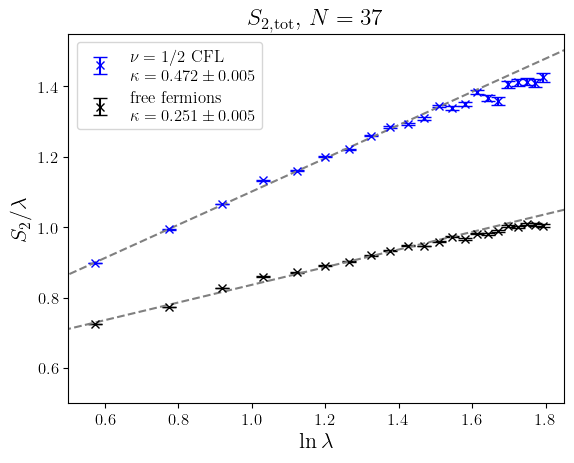

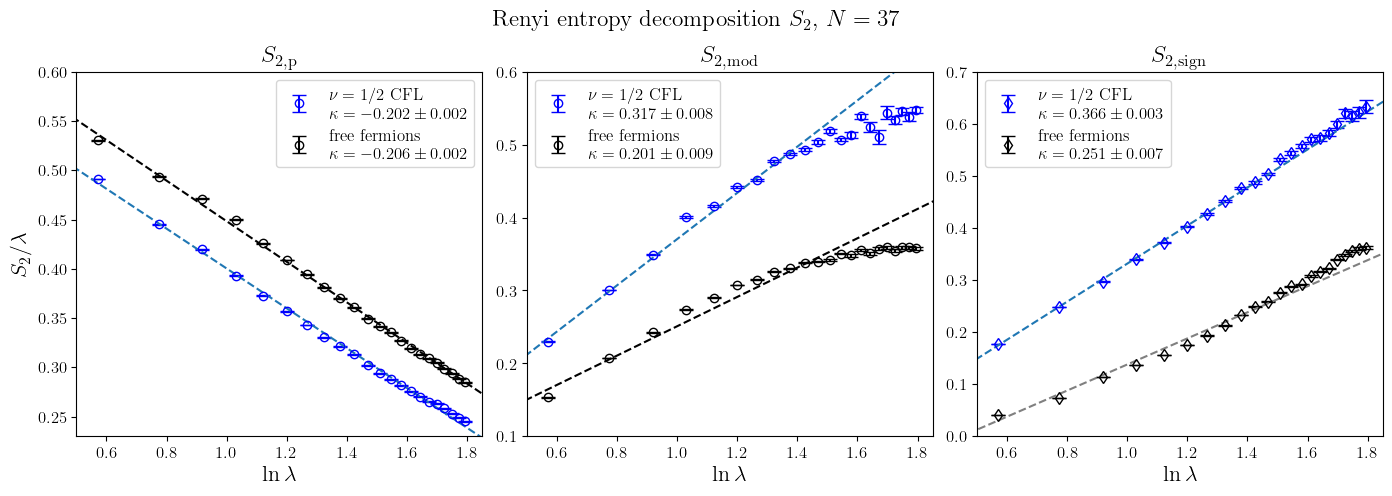

In [15]:
plt.errorbar(np.log(x_cfl), (S_cfl/x_cfl), err_cfl, marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.3f} \pm {np.sqrt(pcov_cfl[0,0]):.3f}$')
plt.errorbar(np.log(x_ff), (S_ff/x_ff), err_ff, marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$')
plt.plot(x_fit, y_fit_ff, '--', c='gray')
plt.plot(x_fit, y_fit_cfl, '--', c='gray')
plt.legend()
plt.ylabel('$S_{2}/\\lambda$')
plt.xlabel('$\ln \\lambda$')
plt.xlim(0.5,1.85)
plt.ylim(0.5,1.55)
plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')

plt.savefig(f's2 n={Ne}.png', dpi=450)  

fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle(f'Renyi entropy decomposition $S_2$, $N={Ne}$ ')


ax[0].errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_p_cfl[0]:.3f} \pm {np.sqrt(pcov_p_cfl[0,0]):.3f}$')
ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_p_ff[0]:.3f} \pm {np.sqrt(pcov_p_ff[0,0]):.3f}$')
ax[0].plot(x_fit, y_fit_p_ff, '--', c='black')
ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
ax[0].set_xlim(0.5,1.85)
ax[0].set_ylim(0.23,0.6)
ax[0].set_title('$S_{2, \mathrm{p}}$')


ax[1].errorbar(np.log(x_cfl), (S_mod_cfl/x_cfl), err_mod_cfl, marker='o',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_mod_cfl[0]:.3f} \pm {np.sqrt(pcov_mod_cfl[0,0]):.3f}$')
ax[1].errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='o',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_mod_ff[0]:.3f} \pm {np.sqrt(pcov_mod_ff[0,0]):.3f}$')
ax[1].plot(x_fit, y_fit_mod_cfl, '--', c='tab:blue')
ax[1].plot(x_fit, y_fit_mod_ff, '--', c='black')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')
ax[1].set_xlim(0.5,1.85)
ax[1].set_ylim(0.1,0.6)

ax[2].errorbar(np.log(x_cfl), (S_sign_cfl/x_cfl), err_sign_cfl, marker='d',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='d',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.5,1.85)
ax[2].set_ylim(0.,0.7)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)

plt.savefig(f's2 decomposition n={Ne}.png', dpi=450)  

## N = 69

In [49]:
Ne = 69
M0 = int(1e5)

M_cfl = int(10e6)
M_ff_p = int(10e6)
M_ff_mod = int(50e6)

nbr_pts = -1

p_ff = np.loadtxt(f"dense_free_fermions_p_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.038_circles.dat")
mod_ff = np.loadtxt(f"dense_free_fermions_mod_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.038_circles.dat")
sign_ff = np.loadtxt(f"dense_free_fermions_sign_Ne_{Ne}_Ns_{2*Ne}_t_1.00_step_0.038_circles.dat")
p_ff_means = p_ff[1:nbr_pts,1]
p_ff_vars = p_ff[1:nbr_pts,2]
mod_ff_means = mod_ff[1:nbr_pts,1]
mod_ff_vars = mod_ff[1:nbr_pts,2]
sign_ff_means = sign_ff[1:nbr_pts,1]
sign_ff_vars = sign_ff[1:nbr_pts,2]

boundaries_ff = p_ff[1:nbr_pts,0]
x_ff =  np.sqrt(boundaries_ff/np.pi)*np.sqrt(kf[Ne]*np.pi/Ne)*Lx[Ne]

In [50]:
S_p_ff = -np.log(p_ff_means)
err_p_ff = np.sqrt(p_ff_vars/(p_ff_means**2))/np.sqrt(M_ff_p-M0)

S_mod_ff = -np.log(mod_ff_means)
err_mod_ff = np.sqrt(mod_ff_vars/(mod_ff_means**2))/np.sqrt(M_ff_mod-M0)

S_sign_ff = -np.log(sign_ff_means)
err_sign_ff = np.sqrt(sign_ff_vars/(sign_ff_means**2))/np.sqrt(M_ff_mod-M0)

S_ff = S_p_ff + S_mod_ff + S_sign_ff
err_ff = np.sqrt(err_p_ff**2 + err_mod_ff**2 + err_sign_ff**2)

In [51]:
popt_ff, pcov_ff = np.polyfit(np.log(x_ff), S_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_p_ff, pcov_p_ff = np.polyfit(np.log(x_ff), S_p_ff/x_ff, deg=1, cov=True, w=1/err_p_ff)
popt_mod_ff, pcov_mod_ff = np.polyfit(np.log(x_ff), S_mod_ff/x_ff, deg=1, cov=True, w=1/err_ff)
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), S_sign_ff/x_ff, deg=1, cov=True, w=1/err_ff)

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_p_ff = x_fit*popt_p_ff[0] + popt_p_ff[1]
y_fit_mod_ff = x_fit*popt_mod_ff[0] + popt_mod_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

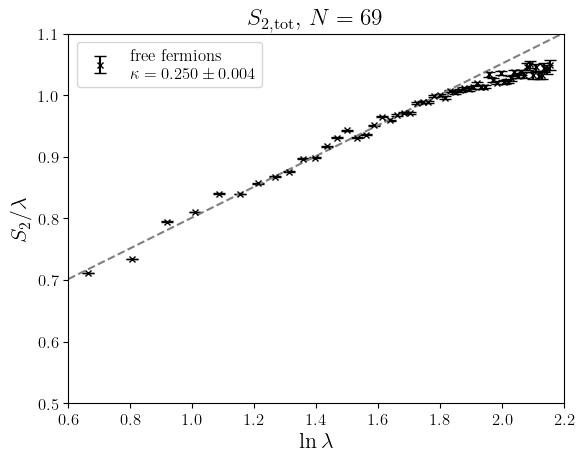

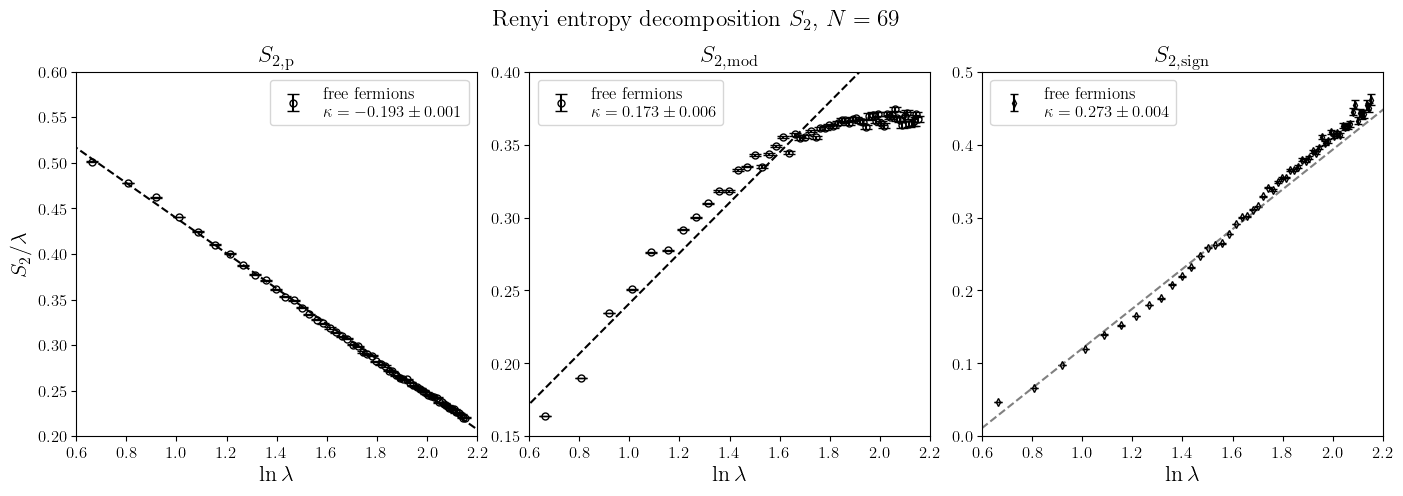

In [52]:
#plt.errorbar(np.log(x_cfl), (S_cfl/x_cfl), err_cfl, marker='x',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl[0]:.3f} \pm {np.sqrt(pcov_cfl[0,0]):.3f}$')
plt.errorbar(np.log(x_ff), (S_ff/x_ff), err_ff, marker='x',
             color='black', markersize=5, capsize=4, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$')
plt.plot(x_fit, y_fit_ff, '--', c='gray')
#plt.plot(x_fit, y_fit_cfl, '--', c='gray')
plt.legend()
plt.ylabel('$S_{2}/\\lambda$')
plt.xlabel('$\ln \\lambda$')
plt.xlim(0.6,2.2)
plt.ylim(0.5,1.1)
plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')

#plt.savefig(f's2 n={Ne}.png', dpi=450)  

fig, ax = plt.subplots(1,3, figsize=(14,5))
fig.suptitle(f'Renyi entropy decomposition $S_2$, $N={Ne}$ ')


#ax[0].errorbar(np.log(x_cfl), (S_p_cfl/x_cfl), err_p_cfl, marker='o',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_p_cfl[0]:.3f} \pm {np.sqrt(pcov_p_cfl[0,0]):.3f}$')
#ax[0].plot(x_fit, y_fit_p_cfl, '--', c='tab:blue')
ax[0].errorbar(np.log(x_ff), (S_p_ff/x_ff), err_p_ff, marker='o',
             color='black', markersize=5, capsize=4, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_p_ff[0]:.3f} \pm {np.sqrt(pcov_p_ff[0,0]):.3f}$')
ax[0].plot(x_fit, y_fit_p_ff, '--', c='black')
ax[0].legend()
ax[0].set_xlabel('$\ln \\lambda$')
ax[0].set_ylabel('$S_{2}/\lambda$')
ax[0].set_xlim(0.6,2.2)
ax[0].set_ylim(0.2,0.6)
ax[0].set_title('$S_{2, \mathrm{p}}$')


#ax[1].errorbar(np.log(x_cfl), (S_mod_cfl/x_cfl), err_mod_cfl, marker='o',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_mod_cfl[0]:.3f} \pm {np.sqrt(pcov_mod_cfl[0,0]):.3f}$')
ax[1].errorbar(np.log(x_ff), (S_mod_ff/x_ff), err_mod_ff, marker='o',
             color='black', markersize=5, capsize=4, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_mod_ff[0]:.3f} \pm {np.sqrt(pcov_mod_ff[0,0]):.3f}$')
#ax[1].plot(x_fit, y_fit_mod_cfl, '--', c='tab:blue')
ax[1].plot(x_fit, y_fit_mod_ff, '--', c='black')
ax[1].legend()
ax[1].set_xlabel('$\ln \\lambda$')
ax[1].set_title('$S_{2, \mathrm{mod}}$')
ax[1].set_xlim(0.6,2.2)
ax[1].set_ylim(0.15,0.4)

#ax[2].errorbar(np.log(x_cfl), (S_sign_cfl/x_cfl), err_sign_cfl, marker='d',
#             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_sign_cfl[0]:.3f} \pm {np.sqrt(pcov_sign_cfl[0,0]):.3f}$')
#ax[2].plot(x_fit, y_fit_sign_cfl, '--', c='tab:blue')
ax[2].errorbar(np.log(x_ff), (S_sign_ff/x_ff), err_sign_ff, marker='d',
             color='black', markersize=4, capsize=3, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_sign_ff[0]:.3f} \pm {np.sqrt(pcov_sign_ff[0,0]):.3f}$')
ax[2].plot(x_fit, y_fit_sign_ff, '--', c='gray')
ax[2].legend()
ax[2].set_xlabel('$\ln \\lambda$')
ax[2].set_xlim(0.6,2.2)
ax[2].set_ylim(0.0,0.5)
ax[2].set_title('$S_{2, \mathrm{sign}}$')

plt.tight_layout(pad=0.7)